In [58]:
import datetime
import h5py
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import tables
from tqdm import tqdm
%matplotlib inline
import random
import math
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams["figure.figsize"] = (20,10)
from collections import Counter

In [79]:
df = pd.read_hdf(r"C:\Users\ag-bahl\Desktop\sine_gratings_8_directions\data_preprocessed_sine_8.hdf5")
df.reset_index(inplace = True)
print('done all data')

done all data


In [84]:
df = df[np.isfinite(df['radius'])]
len(df1)

827897

In [158]:
# lets just make a dataframe for each stimulus and have a cdf for each! a simple one! and compare them

def subset_dfs(df):
    list_dfs = []
    list_dfs_str = df['stimulus_name'].unique().tolist()
    for i in list_dfs_str:
        list_dfs.append(df[df['stimulus_name']== i])
    return list_dfs,list_dfs_str

def add_combinations_subsets(ls_ls_dfs,name,list_dfs,list_dfs_str):
    for combo in range(len(ls_ls_dfs)):
        list_dfs.append(pd.concat(ls_ls_dfs[combo]))
        list_dfs_str.append(name[combo])
    return list_dfs,list_dfs_str


In [138]:
plot_which = 'cdf'
bla = plot_which+str('_r')
bla

'cdf_r'

In [188]:
len(df['ring_membership'].unique().tolist())


11

In [231]:
df['ring_membership'].unique()

array([ 6.,  5.,  4.,  3.,  2.,  1.,  0.,  8.,  7.,  9., nan])

In [224]:
for element in range(len(radi)):
    radi[element] = round(radi[element],1)
radi

[0, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8, 0.9, 0.9, 1.0]

In [301]:
#plt.hist(df_down['radius'],color = 'red',bins = 20)
# redefine it to plot both pdf and cdf separately?

def pdf_cdf(list_var,plot_which,label_1):
    plt.rcParams["figure.figsize"] = (20,10)
  #  plt.hist(list_var,bins=[0,1,2,3,4,5,6,7,8,9,10])
  #  plt.title(str(i))
  #  plt.show()
    count, bins_count = np.histogram(list_var, bins=[0,1,2,3,4,5,6,7,8,9,10])
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    ls = [cdf,pdf]
    plt.plot(bins_count[1:], ls[plot_which], label=label_1)

def cdf_pdf_multiple(variable,df_list,label_list):
    zero_one = [0,1]
    plot_which = ['CDF', 'PDF']
    for pl in zero_one:
        for i in range(len(df_list)):
            df_temp = df_list[i]
            df_temp = df_temp[np.isfinite(df_temp[variable])]
            list_of_directions = df_temp[variable].tolist()
            pdf_cdf(list_of_directions,zero_one[pl],label_list[i])
            print('smaller than 0.3: '+str(len(df_temp[df_temp['radius']<0.316])/len(df_temp)))
            print('bigger than 0.948: '+str(len(df_temp[df_temp['radius']>0.948])/len(df_temp)))

        h = 10
        if variable == 'radius':
            h = 1
        sampl = np.random.uniform(low=-1, high=h, size=(len(df),))
        pdf_cdf(sampl,zero_one[pl],' Random')
        plt.legend()
        plt.title(str(plot_which[pl]) + ' '+ variable,size = 20)
        plt.xlabel(' probability',size = 20)
        plt.ylabel('ring membership',size = 20)
        plt.show()
#cdf_pdf(df_list []):

smaller than 0.3: 0.07831737742964898
bigger than 0.948: 0.02691035683202785
smaller than 0.3: 0.05975827496223046
bigger than 0.948: 0.03719269331135833
smaller than 0.3: 0.05017559223283619
bigger than 0.948: 0.05424146836212212
smaller than 0.3: 0.049854177837646965
bigger than 0.948: 0.03728600761152453
smaller than 0.3: 0.06419585994641848
bigger than 0.948: 0.04585948291045952
smaller than 0.3: 0.07245882907173715
bigger than 0.948: 0.04295007367165496
smaller than 0.3: 0.06126484836419139
bigger than 0.948: 0.04018846638794877
smaller than 0.3: 0.06180735981860267
bigger than 0.948: 0.04806084368652275
smaller than 0.3: 0.0799419714438421
bigger than 0.948: 0.03913655253656781


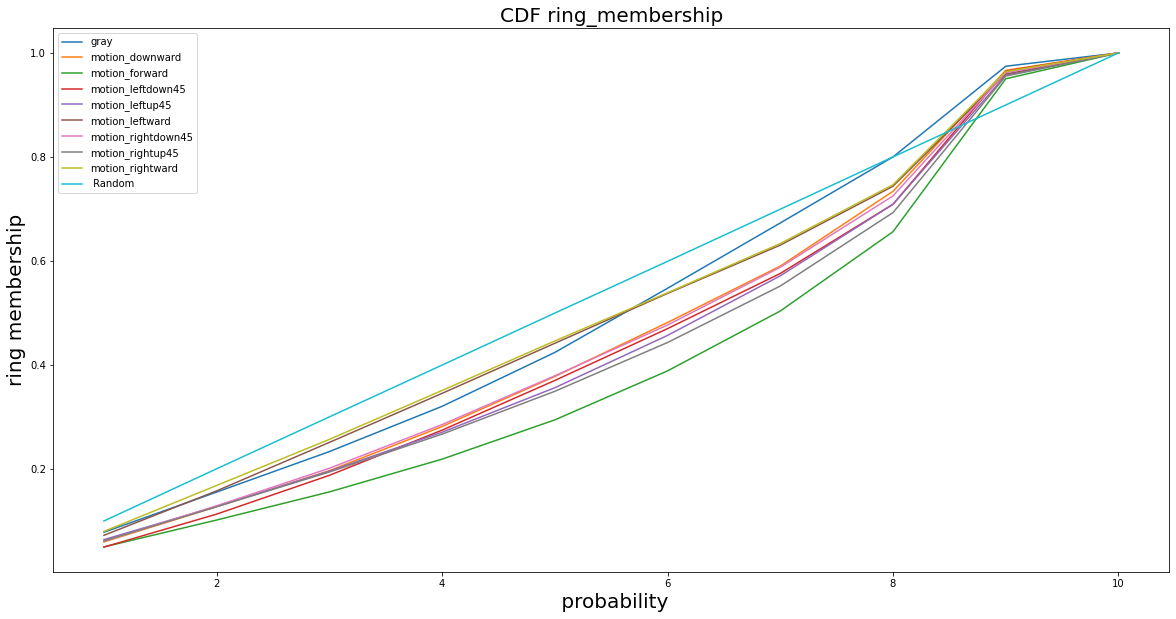

smaller than 0.3: 0.07831737742964898
bigger than 0.948: 0.02691035683202785
smaller than 0.3: 0.05975827496223046
bigger than 0.948: 0.03719269331135833
smaller than 0.3: 0.05017559223283619
bigger than 0.948: 0.05424146836212212
smaller than 0.3: 0.049854177837646965
bigger than 0.948: 0.03728600761152453
smaller than 0.3: 0.06419585994641848
bigger than 0.948: 0.04585948291045952
smaller than 0.3: 0.07245882907173715
bigger than 0.948: 0.04295007367165496
smaller than 0.3: 0.06126484836419139
bigger than 0.948: 0.04018846638794877
smaller than 0.3: 0.06180735981860267
bigger than 0.948: 0.04806084368652275
smaller than 0.3: 0.0799419714438421
bigger than 0.948: 0.03913655253656781


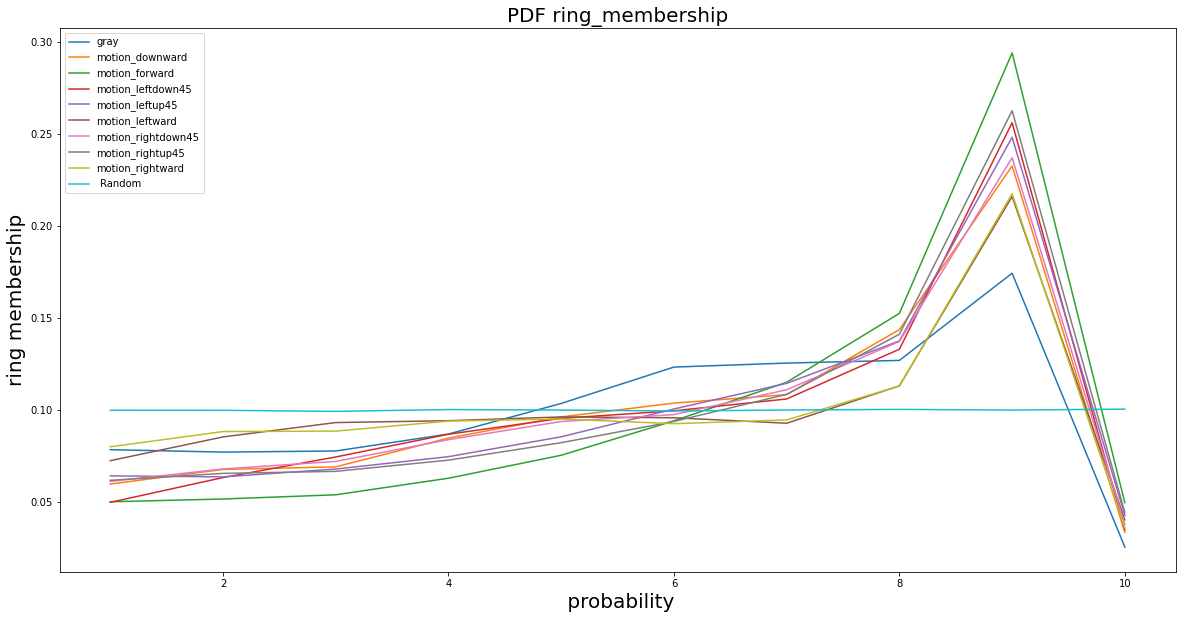

In [302]:
list_dfs,list_dfs_str = subset_dfs(df)
cdf_pdf_multiple(variable = 'ring_membership',df_list = list_dfs,label_list = list_dfs_str)

smaller than 0.3: 0.07831737742964898
bigger than 0.948: 0.02691035683202785
smaller than 0.3: 0.05975827496223046
bigger than 0.948: 0.03719269331135833
smaller than 0.3: 0.05017559223283619
bigger than 0.948: 0.05424146836212212
smaller than 0.3: 0.049854177837646965
bigger than 0.948: 0.03728600761152453
smaller than 0.3: 0.06419585994641848
bigger than 0.948: 0.04585948291045952
smaller than 0.3: 0.07245882907173715
bigger than 0.948: 0.04295007367165496
smaller than 0.3: 0.06126484836419139
bigger than 0.948: 0.04018846638794877
smaller than 0.3: 0.06180735981860267
bigger than 0.948: 0.04806084368652275
smaller than 0.3: 0.0799419714438421
bigger than 0.948: 0.03913655253656781


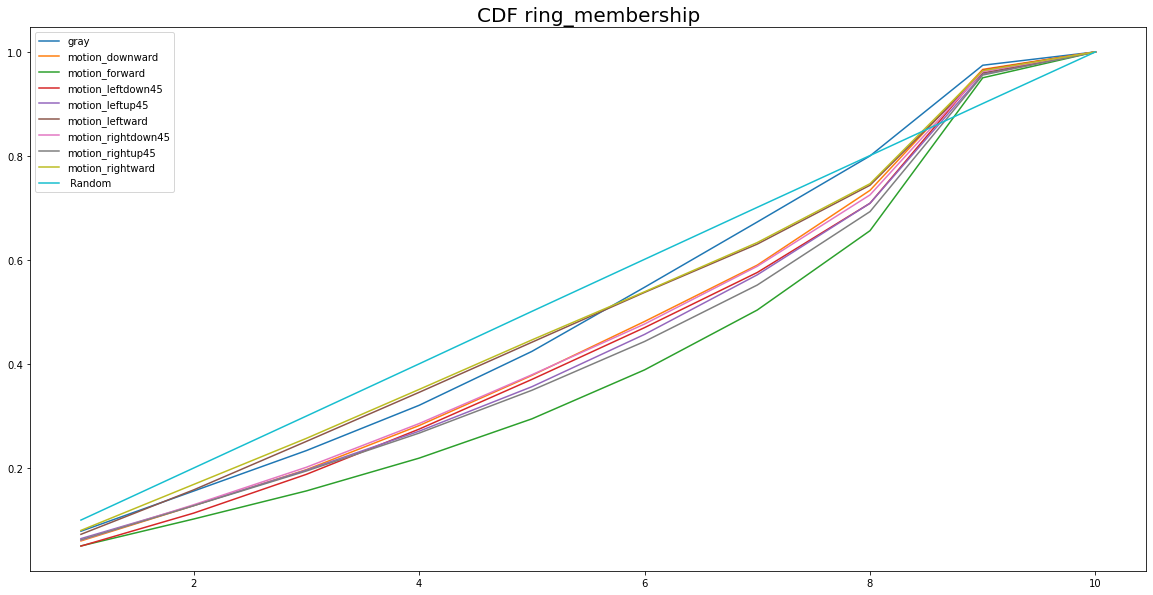

smaller than 0.3: 0.07831737742964898
bigger than 0.948: 0.02691035683202785
smaller than 0.3: 0.05975827496223046
bigger than 0.948: 0.03719269331135833
smaller than 0.3: 0.05017559223283619
bigger than 0.948: 0.05424146836212212
smaller than 0.3: 0.049854177837646965
bigger than 0.948: 0.03728600761152453
smaller than 0.3: 0.06419585994641848
bigger than 0.948: 0.04585948291045952
smaller than 0.3: 0.07245882907173715
bigger than 0.948: 0.04295007367165496
smaller than 0.3: 0.06126484836419139
bigger than 0.948: 0.04018846638794877
smaller than 0.3: 0.06180735981860267
bigger than 0.948: 0.04806084368652275
smaller than 0.3: 0.0799419714438421
bigger than 0.948: 0.03913655253656781


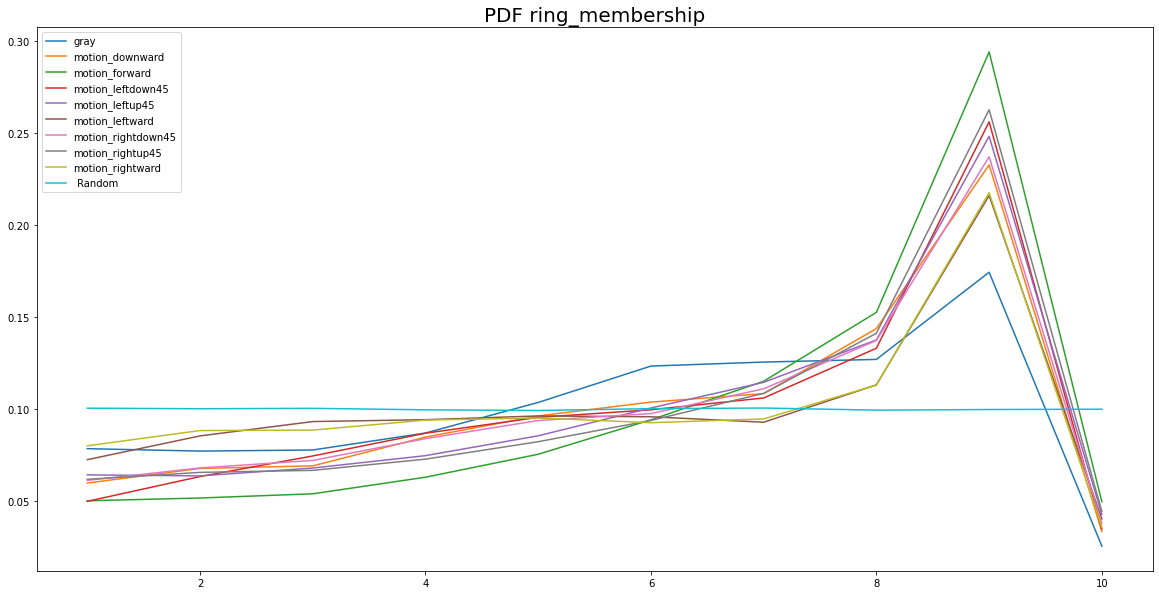

In [291]:
list_dfs,list_dfs_str = subset_dfs(df)
cdf_pdf_multiple(variable = 'ring_membership',df_list = list_dfs,label_list = list_dfs_str)

In [241]:
radi

[0,
 0.31622776601683794,
 0.447213595499958,
 0.5477225575051661,
 0.6324555320336759,
 0.7071067811865476,
 0.7745966692414833,
 0.8366600265340756,
 0.894427190999916,
 0.9486832980505138,
 1.0]

In [245]:
len(df[df['radius']>0.948])/len(df)*100

4.2174328449070355

In [ ]:
list_dfs,list_dfs_str = subset_dfs(df)
cdf_pdf_multiple(variable = 'radius',df_list = list_dfs,label_list = list_dfs_str)

0.31622776601683794


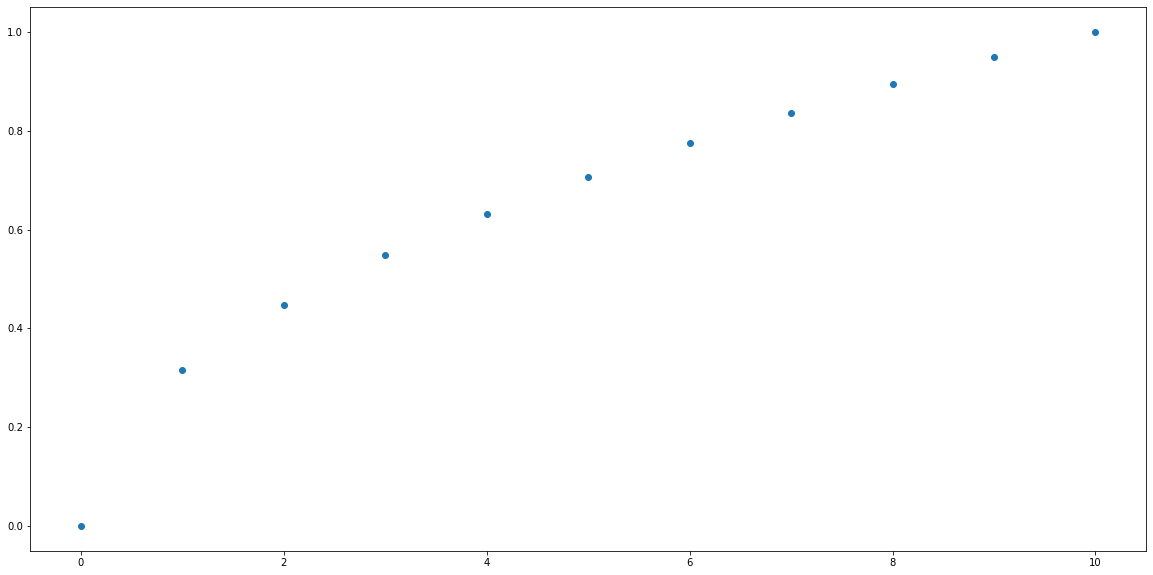

In [240]:
# create 10 rings with same diameter!
def ring_x(x=10):
    c = 1/(math.sqrt(10))
    ls_cs = [0,c]
    print(c)
    for i in range(2,x+1):
        ls_cs.append(c*(math.sqrt(i)))
    return ls_cs
radi = radius_x(10)
plt.scatter(range(0,11),radi)

In [177]:
radi

[0,
 0.31622776601683794,
 0.447213595499958,
 0.5477225575051661,
 0.6324555320336759,
 0.7071067811865476,
 0.7745966692414833,
 0.8366600265340756,
 0.894427190999916,
 0.9486832980505138,
 1.0]

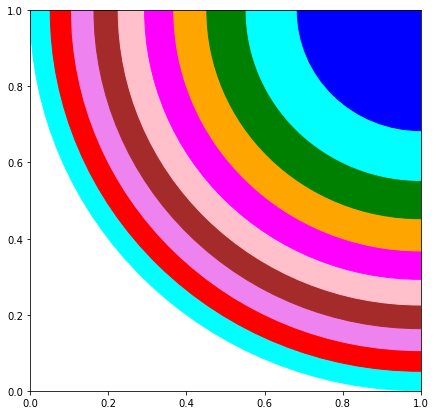

In [298]:
colors = ['red','blue','cyan','green','orange','magenta','pink','brown','violet','red','cyan']

fig, ax = plt.subplots(figsize=(7, 7)) # note we must use plt.subplots, not plt.subplot
for i in range(10, 0, -1):
    circle = plt.Circle((1, 1), radi[i], color=colors[i])
    ax.add_patch(circle)

#plt.show()
# (or if you have an existing figure)
# fig = plt.gcf()

# ax = fig.gca()


In [204]:
radi = radius_x(10)
df = df[np.isfinite(df['radius'])]

a = np.empty((len(df),))
a[:] = np.nan
ring_membership = a.tolist()
radius_l = df['radius'].tolist()
ring = 0
iter = 0
for couples in range(1,len(radi)):
    for val in range(len(df)):
        if ((radius_l[val]>=radi[couples-1]) and (radius_l[val]<=radi[couples])):
            ring_membership[val] =ring
            iter+=1
    print('ring ' +str(ring) + ' has value range of '+str(radi[couples-1])+' to ' +str(radi[couples]))
    ring+=1
print(len(df), iter)
print(set(ring_membership))
print(len(set(ring_membership)))
df['ring_membership'] = ring_membership
df

0.31622776601683794
[0, 0.31622776601683794, 0.447213595499958, 0.5477225575051661, 0.6324555320336759, 0.7071067811865476, 0.7745966692414833, 0.8366600265340756, 0.894427190999916, 0.9486832980505138, 1.0]
ring 0 has value range of 0 to 0.31622776601683794
ring 1 has value range of 0.31622776601683794 to 0.447213595499958
ring 2 has value range of 0.447213595499958 to 0.5477225575051661
ring 3 has value range of 0.5477225575051661 to 0.6324555320336759
ring 4 has value range of 0.6324555320336759 to 0.7071067811865476
ring 5 has value range of 0.7071067811865476 to 0.7745966692414833
ring 6 has value range of 0.7745966692414833 to 0.8366600265340756
ring 7 has value range of 0.8366600265340756 to 0.894427190999916
ring 8 has value range of 0.894427190999916 to 0.9486832980505138
ring 9 has value range of 0.9486832980505138 to 1.0
827897 827864
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

,index,setup_index,arena_index,experiment_repeat,fish_ID,folder_name,fish_genotype,fish_age,stimulus_name,trial,...,estimated_orientation_change_flipped,time,left_bouts,right_bouts,straight_bouts,bout_orientation,bout_orientation_absolute,left_bouts_absolute,right_bouts_absolute,ring_membership
0,0,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,...,-24.707858,0.978714,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0,6.0
1,1,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,...,-5.445908,2.134261,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0,6.0
2,2,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,...,-36.886872,5.378679,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0,6.0
3,3,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,...,-4.694998,6.578669,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0,6.0
4,4,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,...,-0.539227,8.911983,0.0,0.0,1.0,0.0,-1.0,0.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842530,842530,1,7,0,106,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_rightward,7,...,-1.854388,45.813743,0.0,0.0,1.0,0.0,-1.0,0.0,1.0,8.0
842531,842531,1,7,0,106,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_rightward,7,...,0.572336,46.524848,0.0,0.0,1.0,0.0,1.0,1.0,0.0,8.0
842532,842532,1,7,0,106,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_rightward,7,...,1.344777,48.191501,0.0,0.0,1.0,0.0,1.0,1.0,0.0,8.0
842533,842533,1,7,0,106,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_rightward,7,...,0.153143,49.48038,0.0,0.0,1.0,0.0,1.0,1.0,0.0,8.0


In [98]:
# how many members each ring has? theory all equal. if the fish is swimming straight path toward somewhere, like the corner? then no more! or less than when it likes the stimulus, not likes stimulus it goes corner.

10

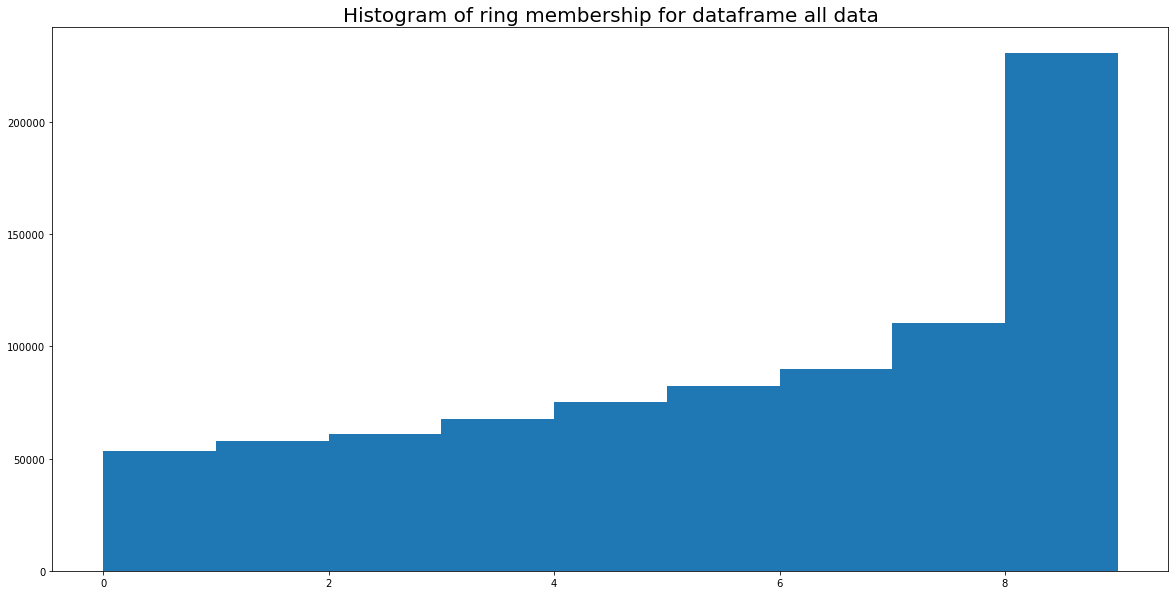

In [166]:
def plot_histogram(dataframe,name_df,variable,bin_range):
    plt.hist(dataframe[variable],bins = bin_range)
    plt.title('Histogram of ring membership for dataframe '+str(name_df), size = 20)
    plt.show()
plot_histogram(dataframe=df,name_df = 'all data',variable='ring_membership',bin_range = list(range(0,10)))

In [ ]:
# add compare pairs of subsets and which
